In [7]:
import numpy as np
import matplotlib.pyplot as plt
import denn.utils as ut

In [46]:
# gan_reps1 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps.npy')
# gan_reps2 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n200.npy')
gan_reps = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n400.npy')
l2_reps = np.load('/Users/dylanrandle/Downloads/coo_mse_rand_reps_n400.npy')
l1_reps = np.load('/Users/dylanrandle/Downloads/coo_l1_rand_reps_n400.npy')
huber_reps = np.load('/Users/dylanrandle/Downloads/coo_huber_rand_reps_n400.npy')

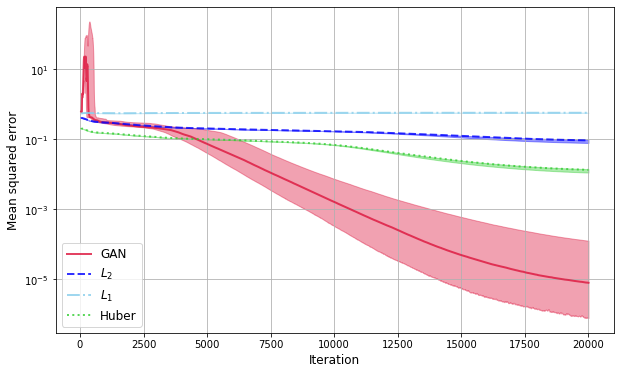

In [49]:
arrs_dict = {
    "GAN": gan_reps, 
    "$L_2$": l2_reps,
    "$L_1$": l1_reps,
    "Huber": huber_reps,
#     "RK4": mse*np.ones_like(l2_reps)
}
ut.plot_reps_results(arrs_dict, fname="coo_rand_reps.jpg", window=50, figsize=(10,6), pctiles=(2.5,97.5))

# RK4

In [38]:
from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def coo_deriv(t, xy):
    """ 
    dxdt = -ty
    dydt = tx
    """
    x, y = xy[0], xy[1]
    
    rhs1 = -t*y
    rhs2 = t*x
    return np.array([rhs1, rhs2])
    return rhs

In [40]:
t, sol = rk4(coo_deriv, [0, 6.28], [1, 0], 400)

In [41]:
from denn.problems import CoupledOscillator
import torch
sir_sol = CoupledOscillator(x0=1, y0=0, n=400).get_solution(torch.tensor(t))

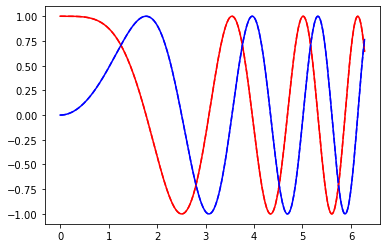

In [42]:
plt.plot(t, sol[:,0], color='red')
plt.plot(t, sol[:,1], color='blue')

plt.plot(t, sir_sol[:,0], '--', color='red')
plt.plot(t, sir_sol[:,1], '--', color='blue')

In [43]:
mse = np.mean( (sol - sir_sol.numpy())**2 )
mse

1.0445355634902771e-12